<a href="https://colab.research.google.com/github/jen0707/AIModeling/blob/Regression/hw01_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [ ]:
nbastat = pd.read_csv("/content/drive/MyDrive/smuai2025/nbastat2022c.csv")
nbastat

,#,PLAYER,Position,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EF
0,1,Joel Embiid,C,56,33.4,29.9,9.4,19.3,48.9,1.4,...,11.9,82.1,2.1,9.3,11.4,4.4,1.0,1.4,3.0,33.2
1,2,Giannis Antetokounmpo,F,59,32.9,29.8,10.2,18.6,54.7,1.1,...,11.6,72.1,2.0,9.5,11.5,5.8,1.1,1.4,3.2,34.8
2,3,LeBron James,F,51,36.9,29.5,11.1,21.3,52.0,2.8,...,6.0,76.0,1.1,7.0,8.1,6.2,1.4,1.1,3.5,31.1
3,4,Luka Doncic,G,53,35.7,28.2,9.9,21.8,45.5,2.9,...,7.4,74.4,0.9,8.4,9.3,8.6,1.2,0.6,4.5,29.6
4,5,Trae Young,G,64,34.9,28.0,9.3,20.4,45.6,3.0,...,7.2,90.0,0.6,3.2,3.8,9.5,1.0,0.1,4.0,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,243,Isaiah Joe,G,48,11.6,3.6,1.1,3.3,35.0,0.8,...,0.5,92.3,0.1,0.9,1.0,0.7,0.3,0.1,0.3,3.1
243,244,Tony Snell,G,49,15.8,3.4,1.2,3.1,39.2,0.9,...,0.1,100.0,0.3,1.7,2.0,0.5,0.3,0.2,0.4,4.1
244,245,Dalano Banton,G,58,11.5,3.4,1.4,3.4,40.3,0.2,...,0.7,61.5,0.6,1.4,2.0,1.6,0.5,0.2,0.9,4.4
245,246,Trent Forrest,G,54,12.6,3.2,1.2,2.5,50.4,0.1,...,0.8,83.7,0.3,1.3,1.6,1.7,0.5,0.1,0.9,5.0


In [ ]:
X = nbastat[["FG%","3P%", "FT%", "MIN"]]
Y = nbastat[["PTS"]]

In [ ]:
X = X.dropna()
Y= Y.dropna()

In [ ]:
m  = len(X)

In [ ]:
X = (np.array(X)). reshape(m, 4)
Y= (np.array(Y)).reshape(m,1)

In [ ]:
theta = np.zeros((15,1))
gradients = np.zeros((15,1))

In [ ]:
learning_rate = 0.01
n_iter = 200

In [ ]:
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
x0 = np.ones((m,1))
Xb = np.c_[x0, X_poly]

In [ ]:
scaler = MinMaxScaler()
Xb = scaler.fit_transform(Xb)

In [ ]:
losses = []

for i in range(n_iter):
  Y_pred = Xb.dot(theta)
  gradients = (1.0/m) * Xb.T.dot(Y_pred - Y)
  theta = theta - learning_rate*gradients
  loss = (1/(2*m)) * np.sum((Y_pred - Y)**2)
  losses.append(loss)

In [ ]:
theta

array([[0.        ],
       [1.20132502],
       [1.3334284 ],
       [2.56163894],
       [3.45537644],
       [0.91181575],
       [0.99951824],
       [1.87485371],
       [2.61762682],
       [0.46184468],
       [2.10870299],
       [1.59367681],
       [2.16235423],
       [3.04410197],
       [3.14636199]])

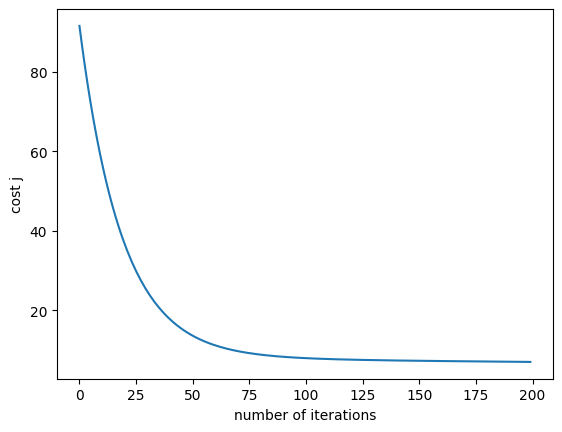

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(n_iter), losses)
plt.xlabel("number of iterations")
plt.ylabel("cost j")
plt.show()